In [1]:
push!(LOAD_PATH, pwd()*"/..")
using LightGraphs, Epidemics, GraphGeneration,IM
using GraphGeneration
using NLsolve
using PyPlot, Distributions
using DegreeDistribution
using DifferentialEquations,TwoDegree
using StatsBase
using DataAnalysis


Use "Dict(a=>b for (a,b) in c)" instead.


In [10]:
c_r = 0.3
N = 400
y_n = 0.1

n_n = Int(N*y_n)#y_n*N
beta = 4.0/(c_r*n_n)
alpha = (N*beta)/n_n

k = 10
sigma_k =10
min_degree = 3

tdp = compute_two_degree_params(k,sigma_k,min_degree)
degr_distr = get_p_k_two_degree(tdp)
# graph_fn = () -> graph_information.graph# graph_from_two_degree_distribution(N,k,sigma_k)
graph_fn = () -> graph_from_two_degree_distribution(N,k,sigma_k)
# degr_distr = get_p_k_gamma(sigma_k,k,min_degree)
# graph_fn = () -> graph_from_gamma_distribution(N,k,sigma_k)

p_k,p_k_neighbor,mean_k = get_p_k_as_vec(degr_distr,N);
ks = find(p_k .> 0)

# p_k_matrix = 0*p_k
p_k_exp,p_k_neighbor_exp = create_p_k_p_k_neighbor_from_graph_fn(graph_fn,10)
# ks,ks_map,N_k,p_k_exp,p_k_neighbor_exp = create_p_k_p_k_neighbor_from_graph_fn(graph_fn())
# p_k_matrix[ks] = p_k_exp
# p_k_neighbor_matrix = zeros(N-1,N-1)
# p_k_neighbor_matrix[ks,ks] = p_k_neighbor_exp


([0.0,0.0,0.6705,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [103]:
p_k[p_k .> 0],ks

([0.666667,0.333333],[3,24])

In [195]:
# Profile.clear()
num_trials = 200_000
fac = 100
hypergeometric = true
p_k_neighbor_is_matrix = true
# @time yy,pp,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor,num_trials,hypergeometric)
@time yy1,pp1,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor,num_trials,hypergeometric)
# @time yy2,pp2,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor,num_trials,~hypergeometric)
# @time yy2,pp2,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor_exp,num_trials,hypergeometric)


# @time yy,pp,y_k_vec = get_p_reach_well_mixed_by_degree_simulation_from_graph(N,alpha,beta,graph_fn,num_trials,fac,hypergeometric,p_k_neighbor_is_matrix)
# @time yy1,pp1,y_k_vec = get_p_reach_well_mixed_by_degree_simulation_from_graph(N,alpha,beta,graph_fn,num_trials,fac,hypergeometric,~p_k_neighbor_is_matrix)
# @time yy1,pp1,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor,num_trials,true)
# @time yy2,pp2,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor,num_trials,true)
# @time yy1,pp1,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor,num_trials,false)
# @time yy_td,pp_td,tuples = get_p_reach_well_mixed_two_degree_simulation(alpha,beta,N,tdp,num_trials);
# @time yy1,pp1,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor,num_trials,true)
# @time yy2,pp2,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor,num_trials,true)
# @time yy1,pp1,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor,num_trials,false)
# @time yy_td,pp_td,tuples = get_p_reach_well_mixed_two_degree_simulation(alpha,beta,N,tdp,num_trials);
# @time yy1,pp1,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor,num_trials,true)
# @time yy1,pp1,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor,10000)
# @time yy2,pp2,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor,10000)
# @time yy3,pp3,y_k_vec = get_p_reach_well_mixed_by_degree_simulation(N,alpha,beta,p_k,p_k_neighbor,10000)

  9.957944 seconds (38.05 M allocations: 5.909 GB, 49.12% gc time)


([0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02,0.0225,0.025  …  0.1725,0.175,0.1775,0.1825,0.19,0.1925,0.195,0.2025,0.2075,1.0],[1.0,0.42798,0.283245,0.218685,0.17986,0.1541,0.135205,0.121295,0.10986,0.100615  …  0.040385,0.04038,0.04036,0.04035,0.040335,0.04033,0.040325,0.04032,0.040315,0.04031],Array{Array{Float64,1},1}[Array{Float64,1}[[0.0,0.00714286],[0.0,0.00714286],[0.00384615,0.00714286],[0.00384615,0.00714286],[0.0,0.00714286],[0.00384615,0.00714286],[0.00769231,0.0142857],[0.0115385,0.0142857],[0.0115385,0.0142857],[0.0115385,0.0142857]  …  [0.930769,0.907143],[0.934615,0.907143],[0.942308,0.95],[0.957692,0.964286],[0.965385,0.985714],[0.973077,0.978571],[0.976923,0.992857],[0.980769,1.0],[0.984615,1.0],[1.0,1.0]],Array{Float64,1}[[0.00396825,0.0],[0.00396825,0.0],[0.00396825,0.0],[0.00396825,0.0],[0.00396825,0.0],[0.0,0.0]],Array{Float64,1}[[0.00387597,0.0],[0.00387597,0.0],[0.00387597,0.0],[0.00387597,0.0],[0.00387597,0.0],[0.00387597,0.0],[0.00387597,0.0],[0.00387597,

In [115]:
y_k_vec[18][1]

2-element Array{Float64,1}:
 0.0       
 0.00724638

In [19]:
for i = 1:length(y_k_vec)
    if maximum(vcat(y_k_vec[i]...)) > 0.1
        println(i)
    end
end

18
63
148
182
190
211
230
249
254
278
344
348
363
392
393
401
411
427
428
475
515
555
585
601
614
621
623
683
688
700
714
739
748
783
797
814
829
890
896
917
984
1004
1020
1052
1053
1087
1109
1130
1140
1194
1247
1292
1328
1335
1346
1450
1523
1549
1570
1612
1645
1652
1660
1692
1710
1713
1714
1716
1723
1740
1774
1854
1868
1869
1871
1873
1879
1886
1918
1965
1970
1981
2028
2072
2077
2083
2097
2113
2114
2134
2162
2194
2205
2250
2252
2254
2326
2343
2357
2374
2383
2404
2430
2451
2493
2525
2529
2563
2571
2589
2605
2614
2633
2646
2670
2701
2717
2727
2746
2775
2827
2876
2942
2998
3004
3042
3052
3065
3074
3160
3184
3197
3201
3202
3231
3239
3342
3374
3391
3425
3431
3442
3447
3450
3464
3467
3482
3484
3514
3574
3643
3716
3725
3778
3787
3788
3800
3809
3816
3829
3843
3845
3863
3879
3886
3912
3957
3964
3973
3996
3997
4027
4044
4065
4082
4091
4099
4111
4164
4165
4180
4200
4214
4215
4226
4254
4257
4272
4276
4284
4305
4337
4362
4371
4387
4409
4453
4462
4492
4513
4527
4567
4606
4631
4659
4660
4680
4734
478

In [221]:
function generate_tuples(y_k_vec,p_k)
    p_k = p_k[p_k .> 0]
    fixed_tuples = []
    nonfixed_tuples = []
    for i = 1:length(y_k_vec)
        fixed = y_k_vec[i][end][1] > 0.5
        for vec in y_k_vec[i]
            y_curr = dot(vec,p_k)
            tup = (y_curr,vec[1],vec[2])
            if fixed
                push!(fixed_tuples,tup)
            else
                push!(nonfixed_tuples,tup)
            end
        end
    end
    fixed_tuples,nonfixed_tuples
end

function get_y1_y2_vecs(tuples,y_bins)
    min_counts = 10
    counts = zeros(y_bins)
    y1_arr = zeros(y_bins)
    y2_arr = zeros(y_bins)
    for tup in tuples
        idx = searchsortedlast(y_bins,tup[1])
        if idx > 0
            y1_arr[idx] += tup[2]
            y2_arr[idx] += tup[3]
            counts[idx] += 1
        end
    end
    y1_arr ./= counts
    y2_arr ./= counts
    y1_arr[counts .< min_counts] = NaN
    y2_arr[counts .< min_counts] = NaN
    y1_arr,y2_arr
end

get_y1_y2_vecs (generic function with 1 method)

In [224]:
fixed_tuples,nonfixed_tuples = generate_tuples(y_k_vec,p_k) 
eps = 0.1/N
y_bins = collect(1/N-eps:1/N:1)
# y_bins = vcat([1/N,2/N,3/N,],logspace(log10(4/N),1.0,30) )
y1_fixed,y2_fixed = get_y1_y2_vecs(fixed_tuples,y_bins)
y1_nonfixed,y2_nonfixed = get_y1_y2_vecs(nonfixed_tuples,y_bins)



([0.00339118,0.00643549,0.00929959,0.0121101,0.0151802,0.0182855,0.0211424,0.0241682,0.0271923,0.0301148  …  NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN],[0.000863134,0.00261919,0.00454488,0.00649153,0.00808281,0.00953469,0.0113558,0.0129026,0.014495,0.0162184  …  NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN])

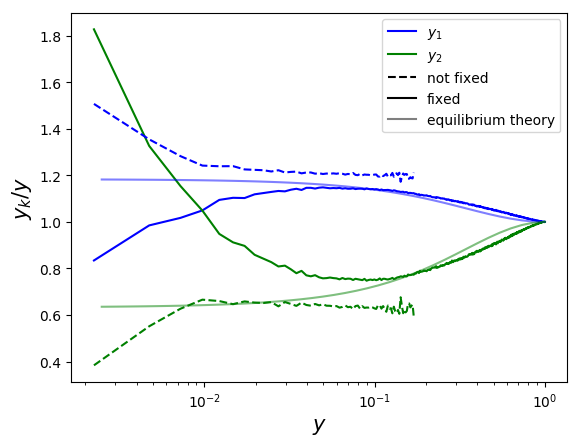

PyObject <matplotlib.text.Text object at 0x360f68d10>

In [239]:
plot(y_bins,y1_fixed./y_bins,"b",label=L"y_1")
plot(y_bins,y2_fixed./y_bins,"g",label=L"y_2")


plot(y_bins,y1_nonfixed./y_bins,"--b")
plot(y_bins,y2_nonfixed./y_bins,"--g")
plot(xxx,yy_eq_p[:,1]./xxx,alpha=0.5,"b")
plot(xxx,yy_eq_p[:,2]./xxx,alpha=0.5,"g")
semilogx([],[])
plot([],[],"--k",label="not fixed")
plot([],[],"-k",label="fixed")
plot([],[],"-k",alpha=0.5,label="equilibrium theory")
legend()
xlabel(L"y",size=15)
ylabel(L"y_k/y",size=15)

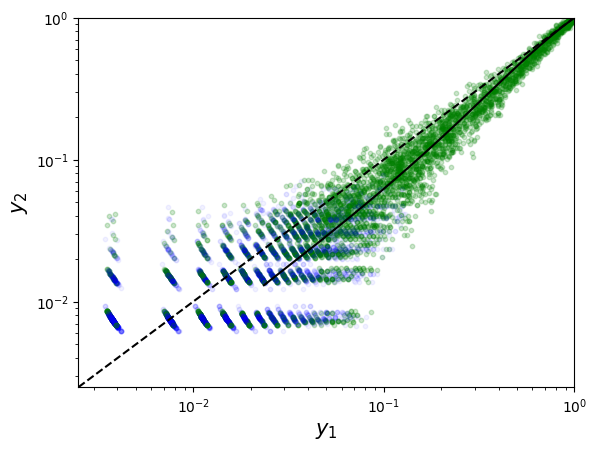

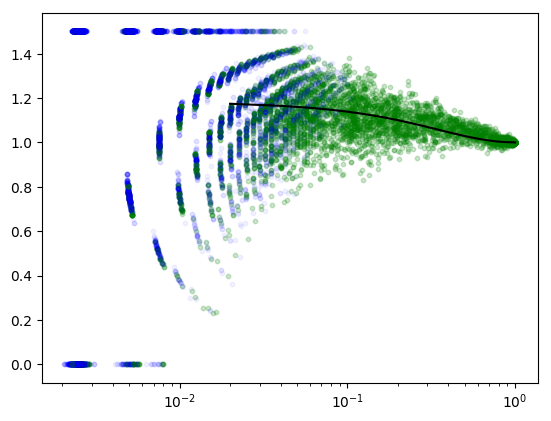

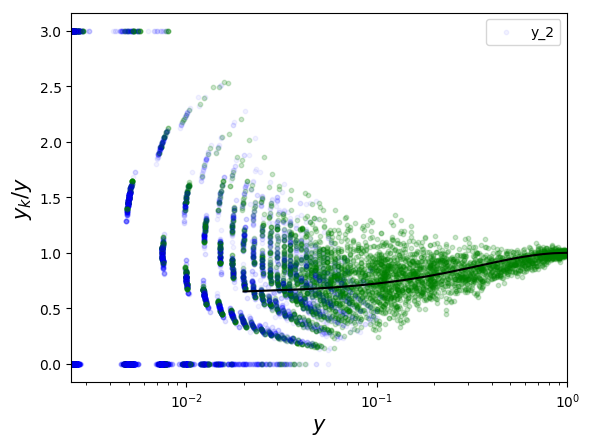

PyObject <matplotlib.legend.Legend object at 0x3652a9b50>

In [110]:
# 
# xxx = collect(0:0.02:1)
# figure(1)
for idx = 1:1000
#     idx = 63
    vec = hcat(y_k_vec[idx]...)'
    y_vec = vec *p_k[ p_k .> 0]
#     semilogy(vec)
    figure(1)
    c = maximum(y_vec) > 0.5 ? "g" : "b"
    alph = maximum(y_vec) > 0.5 ? 0.2 : 0.05
#     scatter(vec[:,1],vec[:,2],s=10,c=collect(1:length(vec[:,1]))/length(vec[:,1]),alpha=0.3)
    scatter(vec[:,1],vec[:,2],s=10,c=c,alpha=alph)
    figure(2)
    label = idx > 1 ? "" : "y_1"
    scatter(y_vec,vec[:,1]./y_vec,s=10,c=c,alpha=alph,label = label)
    figure(3)
    label = idx > 1 ? "" : "y_2"
    scatter(y_vec,vec[:,2]./y_vec,s=10,c=c,alpha=alph,label = label)
end
figure(1)
plot(xx,xx,"--k")
loglog([],[])
xx = logspace(log10(1/N),log10(1),100)#[0.001,0.01,0.1,1]#0:0.1:1
yy_eq_p = hcat(yy_eq...)'
plot(yy_eq_p[:,1],yy_eq_p[:,2],"-k",label="equilibrium theory")
xlim([1/N,1])
ylim([1/N,1])
xlabel(L"$y_1$",size=15)
ylabel(L"$y_2$",size=15)
# colorbar()

figure(2)
semilogx([],[])
plot(xxx,yy_eq_p[:,1]./xxx,"k",label="equilibrium theory")
figure(3)
semilogx([],[])
plot(xxx,yy_eq_p[:,2]./xxx,"k")
xlabel(L"y",size=15)
ylabel(L"y_k/y",size=15)
xlim([1/N,1])
legend(loc="upper right")


In [231]:
yy_eq = []
# xxx = vcat(collect(0:0.02:0.85),collect(0.85:0.15:1))
xxx = vcat(logspace(log10(1/N),log10(0.85),40),collect(0.85:0.15:1))
for (i,y_desired) in enumerate(xxx)
    println(i)
    y_k = get_y_k_equilibrium(y_desired,N,p_k,p_k_neighbor,alpha,beta)
    push!(yy_eq,y_k[1:end-1][p_k .> 0])
end
yy_eq

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


In [236]:
yy_eq_p = hcat(yy_eq...)'

42×2 Array{Float64,2}:
 0.00295577  0.00158846
 0.00343171  0.00184564
 0.00398418  0.00214465
 0.00462546  0.00249239
 0.00536977  0.00289688
 0.00623359  0.00336752
 0.00723604  0.00391529
 0.00839924  0.00455307
 0.00974881  0.00529596
 0.0113144   0.00616169
 0.0131303   0.00717115
 0.0152361   0.00834894
 0.0176776   0.00972412
 ⋮                     
 0.242006    0.18027   
 0.278128    0.215113  
 0.319434    0.256853  
 0.366718    0.30668   
 0.420959    0.365873  
 0.483371    0.435753  
 0.555477    0.517633  
 0.639189    0.612749  
 0.736903    0.722184  
 0.851613    0.846774  
 0.851613    0.846774  
 1.0         1.0       

In [107]:
data_dir_path = "../../data/"  #"/mnt/D/windows/MIT/classes/6/338/project/data/"
filenames = split(readstring(`ls $data_dir_path`));

for (i,filename) in enumerate(filenames[end-3:end-1])
    println(i)
    summarize_p_reach_data(data_dir_path*filename)
end

1
N = 400, k = 10, y_n = NaN, c_r = NaN
alpha = 0.0, beta = 0.0
Graph Type: 6
sigma_k = 10
num trials: 100000
2
N = 400, k = 10, y_n = NaN, c_r = NaN
alpha = 0.0, beta = 0.0
Graph Type: 6
sigma_k = 15
num trials: 400000
3
N = 400, k = 10, y_n = 0.1, c_r = 0.3
alpha = 3.333333333333333, beta = 0.3333333333333333
Graph Type: 6
sigma_k = 10
num trials: 100000


In [106]:
data_dir_path = "../../data/"  #"/mnt/D/windows/MIT/classes/6/338/project/data/"
filenames = split(readstring(`ls $data_dir_path`));
path = data_dir_path*filenames[end-1]
params,yyg,ppg,epidemic_params,k,graph_information,graph_type,runs,num_trials = load_p_reach_data(path);

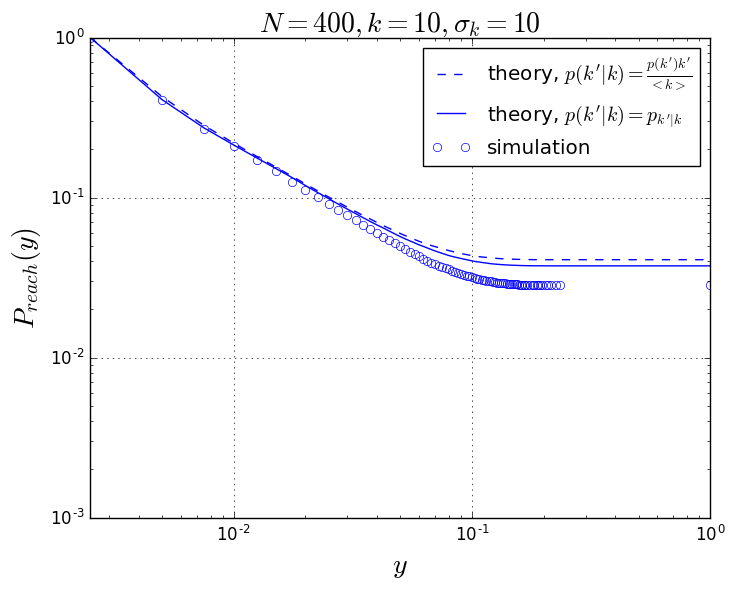

In [110]:

# errorbar_plot(yy,pp,num_trials,"b","--")
lab1 = L"theory, $p(k'|k) = \frac{p(k') k'}{<k>}$"#"degree dist. theory"
lab2 = L"theory, $p(k'|k) = p_{k'|k}$"# "neighbor degree dist. theory"
plot(yy1,pp1,"b",linestyle="--",label=lab1)
plot(yy2,pp2,"b",linestyle="-",label=lab2)
plot(yyg,ppg,"b",linestyle="",marker="o",fillstyle="none",label="simulation")
# errorbar_plot(yy_td,pp_td,num_trials,"g","--")
loglog([],[])
legend(loc="best")

# loglog(yy,pp,color="b")
# loglog(yy_td,pp_td,color="r")
# loglog(yy2,pp2)
# loglog(yy3,pp3)
# loglog(yy1,pp1)
xlim([1/N,1])
ylim([1e-3,1])
xlabel(L"y",size=20)
ylabel(L"P_{reach}(y)",size=20)
title(latexstring("\$N = $N, k = $k, \\sigma_k = $(sigma_k)\$"),size=20)
grid()

In [29]:
function errorbar_plot(yy,pp,num_trials,color="b",linestyle="none",label="")
    errorbars = 2*(pp.*(1-pp)/num_trials).^0.5
    plt[:errorbar](yy,pp,linestyle=linestyle,color = color,yerr=errorbars,label=label)
end
    

errorbar_plot (generic function with 4 methods)

Using p_k_neighbor as a matrix is important for k = 10,sigma_k = 30

Two Degree Graphs don't work as well because the conditional degree distribution is not exactly $k p_k / \bar{k} $

In [53]:
@time yy_td,pp_td,tuples = get_p_reach_well_mixed_two_degree_simulation(alpha,beta,N,tdp,10000);
imk = InfectionModel(x -> 1 + beta + get_s_eff_exact(x,alpha,beta,mean_k,N) , x -> 1 + beta)
yy_rg = logspace(log10(1/N),1,1000);
pp_rg = P_reach_fast(imk,N,1.0/N,yy_rg,true);
# y_arr,y1_arr,y2_arr = compute_y1_y2_vs_y(tuples,N)

  0.956151 seconds (276.39 k allocations: 294.197 MB, 12.79% gc time)


1000-element Array{Float64,1}:
 1.0      
 0.990135 
 0.980367 
 0.970695 
 0.961119 
 0.951638 
 0.94225  
 0.932954 
 0.92375  
 0.914637 
 0.905614 
 0.89668  
 0.887834 
 ⋮        
 0.0130909
 0.0130909
 0.0130909
 0.0130909
 0.0130909
 0.0130909
 0.0130909
 0.0130909
 0.0130909
 0.0130909
 0.0130909
 0.0130909

In [2]:
function step_in_time(drift,diff,y_k_0,dt,p_k,max_steps=1000)
    step = 1
    y_k_arr = Array(Array{Float64,1},0)
    y_tot_arr = Array(Float64,0)
    push!(y_k_arr,y_k_0)
    push!(y_tot_arr,get_y_tot(y_k_0,p_k))
    y_k_curr = y_k_0
    y_tot_curr = get_y_tot(y_k_curr,p_k)
    dim_curr = size(y_k_0)
    while within_bounds(y_tot_curr) && step < max_steps
#         println(drift(y_k_curr))
#         println(diff(y_k_curr))
        d_y = drift(y_k_curr) + randn(dim_curr).*diff(y_k_curr)
        y_k_curr += dt*d_y
        y_tot_curr = get_y_tot(y_k_curr,p_k)
        clamp(y_k_curr,0.0,1.0)
        push!(y_k_arr,y_k_curr)
        push!(y_tot_arr,y_tot_curr)
        step += 1
    end
    return y_k_arr,y_tot_arr
end

function within_bounds(y_arr,p_k)
    y_tot = get_y_tot(y_arr,p_k)
    return within_bounds(y_tot)
end

function within_bounds(y_tot)
    return 1/N <= y_tot <= 1- 1/N
end

function get_y_tot(y_arr,p_k)
    y_tot = dot(y_arr,p_k)
    return y_tot
end



get_y_tot (generic function with 1 method)

In [435]:
y_k_0 = zeros(p_k)
k_0 = tdp.k1
y_k_0[k_0] = 1/N/p_k[k_0]


# alpha,beta = 0,0
# a_fn(t,u) = get_a_k_only(u,p_k,p_k_neighbor,alpha,beta,N)
# b_fn(t,u) = get_b_k_only(u,p_k,p_k_neighbor,alpha,beta,N)
u_0 = y_k_0
a(u) = get_a_k_only(u,p_k,p_k_neighbor,alpha,beta,N)
b(u) = get_b_k_only(u,p_k,p_k_neighbor,alpha,beta,N)
# u_0 = 1.0
# a(t,u) = 1+u# 0.1+t+u+x#get_a_k_only(u,p_k,p_k_neighbor,alpha,beta,N)
# b(t,u) = 1+u#get_b_k_only(u,p_k,p_k_neighbor,alpha,beta,N)
# u_0 = 0.5 
# dt = 1//2^(4)
tspan = (0.0,1.0)
dt = 1

1

In [444]:

u_0 = zeros(p_k)
u_0[k_0] = 0.1
# u_0[k_0] = 1/N./p_k[k_0]
y_k_arr,y_tot_arr = step_in_time(a,b,u_0,dt,p_k);

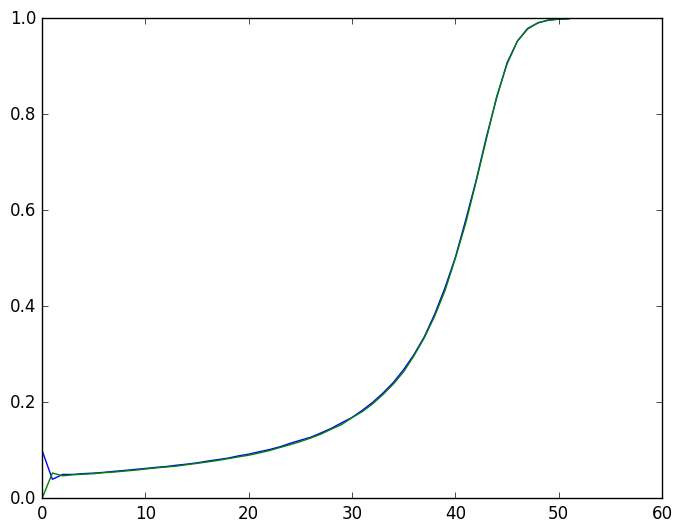

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x34ef5c490>

In [445]:
y_k_sol = hcat(y_k_arr...)'
plot(y_k_sol[:,tdp.k1])
plot(y_k_sol[:,tdp.k2])
# plot(y_k_sol[:,k])
# plot(y_tot_arr)

In [408]:
num_trials = 1000
yy,pp = compute_p_reach(a,b,u_0,dt,p_k,num_trials)

(Any[0.02,0.0200001,0.0200043,0.0200053,0.0200089,0.0200093,0.0200123,0.0200126,0.0200187,0.0200217  …  0.982789,0.982952,0.983127,0.983268,0.98357,0.98359,0.983774,0.983855,0.983987,0.984348],[1.0,0.499,0.498,0.497,0.496,0.495,0.494,0.493,0.492,0.491  …  0.01,0.009,0.008,0.007,0.006,0.005,0.004,0.003,0.002,0.001])

In [37]:
u_0 = y_k_0
tspan = (0.0,2.0)
prob = SDEProblem(a_fn,b_fn,u_0,tspan)#,tspan)
sol = solve(prob,dt=dt,force_dtmin=true);

## why is there a negative bias when the degree distribution is broad?

In [6]:
function get_p_k_test(k,sigma_k,min_degree,targets,probs)
    assert(k-2 > min_degree)
    assert(all(0 .< targets))
    assert(abs(sum(probs) - 1.0) < 1e-10)

    function p_k(x)
        for i = 1:length(targets)
            if is_near(x,targets[i])
                return probs[i]
            end
        end
        return 0.0
    end
    return p_k
end

function is_near(x,target)
    return abs(x-target) < 0.5
end

is_near (generic function with 1 method)